# Programming assignment. Random Forest Classifier
---

In [395]:
from sklearn import (datasets, model_selection,
                     ensemble, tree, metrics,
                     learning_curve)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0 Import data

In [26]:
X, y = datasets.load_digits(return_X_y=True)

In [27]:
print(datasets.load_digits().DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## 1 Preprocessing data

### 1.1 Missing values

In [29]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [37]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [44]:
X_df.head(2)  # Number of attributes = 64: {0, ..., 63}

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [43]:
y_df.T.head(5)  # Number of classes = 5, number of instances = 1796.

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0,1,2,3,4,5,6,7,8,9,...,5,4,8,8,4,9,0,8,9,8


Check if the missing values present

In [49]:
print('X missing vals: ', X_df.isna().any().any())  # First .any() for rows, second — for columns.
print('y missing vals: ', y_df.isna().any().any())  # Same

X missing vals:  False
y missing vals:  False


### 1.2 Categorical features

In this data there are no categorical and binary values, so we continue work with real values.

### 1.3 Stratification

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, stratify=y)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 64) (1257,)
(540, 64) (540,)


### 1.4 Balancing classes

Check if classes are disbalanced.

In [65]:
val_set = set(y)
print('Number of objects of...')
for val in val_set:
    print(f'class {val}:', np.sum(y_train==val))

Number of objects of...
class 0: 124
class 1: 127
class 2: 124
class 3: 128
class 4: 127
class 5: 127
class 6: 127
class 7: 125
class 8: 122
class 9: 126


### 1.5 Scaling

In [83]:
X_train.mean(axis=0)

array([0.00000000e+00, 2.90373906e-01, 5.11774065e+00, 1.18210024e+01,
       1.19037391e+01, 5.77167860e+00, 1.40015911e+00, 1.36833731e-01,
       4.77326969e-03, 1.96340493e+00, 1.03221957e+01, 1.20334129e+01,
       1.02601432e+01, 8.00875099e+00, 1.86316627e+00, 1.33651551e-01,
       3.18217979e-03, 2.65712013e+00, 9.92521877e+00, 6.99363564e+00,
       7.11694511e+00, 7.64916468e+00, 1.83134447e+00, 5.88703262e-02,
       1.59108990e-03, 2.56085919e+00, 9.10262530e+00, 8.76213206e+00,
       9.93874304e+00, 7.49005569e+00, 2.29355609e+00, 2.38663484e-03,
       0.00000000e+00, 2.36833731e+00, 7.68257757e+00, 9.12887828e+00,
       1.03603819e+01, 8.62688942e+00, 2.89737470e+00, 0.00000000e+00,
       9.54653938e-03, 1.63007160e+00, 6.89180589e+00, 7.26014320e+00,
       7.76292761e+00, 8.12251392e+00, 3.44391408e+00, 2.78440732e-02,
       1.03420843e-02, 7.42243437e-01, 7.50596659e+00, 9.57995227e+00,
       9.45107399e+00, 8.61256961e+00, 3.70883055e+00, 2.04455052e-01,
      

It will be better to scale the data, but it is not mentioned in the task, so we pass this step. In most cases scaling is performed as following:

---
```python
    from sklearn.preprocessing import StandartScaler
    scaler = StandartScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
```
---

---
## 2 Models training

### 2.1 Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
"""Definition and training step"""
tree_clf = DecisionTreeClassifier()
# tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
"""Validation step"""
score = model_selection.cross_val_score(tree_clf, X, y, cv=10, n_jobs=-1)
print('Answer:', score.mean())

Answer: 0.8236604157933186


### 2.2 Bagging Classifier

#### 2.2.1 Bagging Classifier with default parameters

In [96]:
from sklearn.ensemble import BaggingClassifier

In [124]:
"""Definition and #training step"""
bagg_clf = BaggingClassifier(n_estimators=100)
# bagg_clf.fit(X, y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [125]:
"""Cross-validation step"""
score = model_selection.cross_val_score(bagg_clf, X, y, cv=10, n_jobs=-1)
print('Answer:', score.mean())

Answer: 0.9221054937586872


#### 2.2.2 Bagging Classifier with contraint of features

In this case we define number of features for training trees as $\sqrt{d}$, where $d$ is the total number of features.

In [391]:
"""Definition and #training step"""
bagg_clf = BaggingClassifier(n_estimators=100,
                             max_features=int(np.sqrt(X.shape[1])))
# bagg_clf.fit(X, y)

"""Cross-validation step"""
score = model_selection.cross_val_score(bagg_clf, X, y, cv=10, n_jobs=-1)
print('Answer:', score.mean())

Answer: 0.9271813255256948


#### 2.2.3 Bagging Classifier with randomized trees

In this case we will define number of features for every base tree.

In [392]:
"""Definition and #training step"""
bagg_clf = BaggingClassifier(DecisionTreeClassifier(max_features='sqrt'),
                             n_estimators=100)
# bagg_clf.fit(X, y)

"""Cross-validation step"""
score = model_selection.cross_val_score(bagg_clf, X, y, cv=10, n_jobs=-1)
print('Answer:', score.mean())

Answer: 0.9555858540647373


### 2.3 Random Forest Classifier

Previous Bagging Classifier with randomized trees from (2.2.3) exactly is the Random Forset Classifier. In this section we will compare RFC from the `sklearn.ensemble` module with the previous one.

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [389]:
"""Definition and #training step"""
rf_clf = RandomForestClassifier(n_estimators=100)
# rf_clf.fit(X, y)

In [390]:
"""Cross-validation step"""
score = model_selection.cross_val_score(rf_clf, X, y, cv=10, n_jobs=-1)
print('Answer:', score.mean())

Answer: 0.9571978276974782


Close enough.

#### 2.3.1 Estimating the impact of parameters of the Random Forest Classifier 

We will compare the following parameters:

---
```python
    'n_estimators': np.arange(5,100, step=5)
    'max_features': np.arange(1, X.shape[1], step=10)
    'max_depth': [1, 5, 10, None] 
```
---

In [260]:
"""Auxiliary function to return arrays of RFC quality values 
according to arrays of different params.
"""
def score_arrays(train_data, train_labels, test_data=None, test_labels=None,
                 n_estimators=10,
                 max_features='auto',
                 max_depth=None,
                 test=False):
    """Fuction to return the array of score values according to parameters
    given in arguments.
    
    Returns
    -------
    n_estimators_q_range : ndarray
    
    max_features_q_range : ndarray
    
    max_depth_q_range : ndarray
    """
    
    from sklearn import model_selection, ensemble
    
    n_estimators_q_range = []
    n_estimators_test_q_range = []
    for num_ests in n_estimators:
        estimator = ensemble.RandomForestClassifier(n_estimators=num_ests)
        estimator.fit(train_data, train_labels)
        
        n_estimators_q_range.append(model_selection.cross_val_score(estimator, 
                                    train_data, train_labels, cv=10, n_jobs=-1).mean())
        if test: 
            n_estimators_test_q_range.append(model_selection.cross_val_score(estimator, 
                                    test_data, test_labels, cv=10, n_jobs=-1).mean())
            
    max_features_q_range = []
    max_features_test_q_range = []
    for n_features in max_features:
        estimator = ensemble.RandomForestClassifier(max_features=n_features)
        estimator.fit(train_data, train_labels)
        
        max_features_q_range.append(model_selection.cross_val_score(estimator, 
                                    train_data, train_labels, cv=10, n_jobs=-1).mean())
        if test: 
            max_features_test_q_range.append(model_selection.cross_val_score(estimator, 
                                    test_data, test_labels, cv=10, n_jobs=-1).mean())
    
    max_depth_q_range = []
    max_depth_test_q_range = []
    for depth in max_depth:
        estimator = ensemble.RandomForestClassifier(max_depth=depth)
        estimator.fit(train_data, train_labels)
        
        max_depth_q_range.append(model_selection.cross_val_score(estimator, 
                                    train_data, train_labels, cv=10, n_jobs=-1).mean())
        if test: 
            max_depth_test_q_range.append(model_selection.cross_val_score(estimator, 
                                    test_data, test_labels, cv=10, n_jobs=-1).mean())
        
    return ([np.array(n_estimators_q_range), 
            np.array(max_features_q_range),
            np.array(max_depth_q_range)],
            [np.array(n_estimators_test_q_range),
            np.array(max_features_test_q_range),
            np.array(max_depth_test_q_range)])


Estimating scores with auxiliary function

In [281]:
%%time
estimators_range = np.arange(5,100, step=5)
max_features_range = np.arange(1, X.shape[1], step=5)
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

# rf_train_score = score_arrays(X_train, y_train, estimators_range,
#                         max_features_range,
#                         max_depth_range)

rf_train_test_score = score_arrays(X_train, y_train, X_test, y_test, estimators_range,
                        max_features_range,
                        max_depth_range, test=True)

CPU times: user 12.3 s, sys: 3.72 s, total: 16.1 s
Wall time: 33.6 s


To see the dependence of the estimate on the parameters plot several we will draw several plots in parameter/quality coordinates

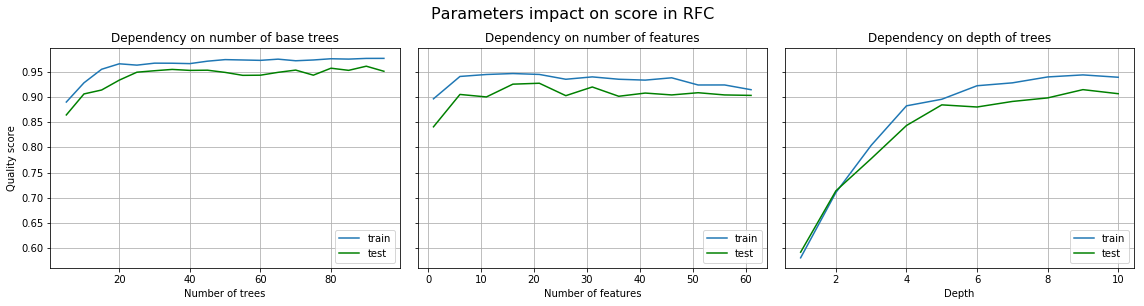

In [283]:
"""Plot dependencies"""
fig, ax = plt.subplots(1,3, sharey=True, figsize=(16,4))

fig.suptitle('Parameters impact on score in RFC', fontsize=16, y=1.05)

ax[0].plot(estimators_range, rf_train_test_score[0][0], label='train')
ax[0].plot(estimators_range, rf_train_test_score[1][0], label='test', c='g')
ax[0].set(xlabel='Number of trees',
          ylabel='Quality score',
         title='Dependency on number of base trees')
ax[0].legend(loc='lower right')

ax[1].plot(max_features_range, rf_train_test_score[0][1], label='train')
ax[1].plot(max_features_range, rf_train_test_score[1][1], label='test', c='g')
ax[1].set(xlabel='Number of features',
         title='Dependency on number of features')
ax[1].legend(loc='lower right')

ax[2].plot(max_depth_range, rf_train_test_score[0][2], label='train')
ax[2].plot(max_depth_range, rf_train_test_score[1][2], label='test', c='g')
ax[2].set(xlabel='Depth',
         title='Dependency on depth of trees')
ax[2].legend(loc='lower right')

for ax in ax:
    ax.grid(True)
    
fig.tight_layout();


Answers according to the task:

 ---
 (2, 3, 4, 7)
 
 ---